# Importing required Library 

In [1]:
# 1 take it in a proper way 
# 2 and make FLask Web App
# 3 And On GitHUB
# 4 Linkdin 
# 5 Resume

In [3]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem.wordnet import WordNetLemmatizer
import nltk#
#nltk.download('omw-1.4')
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
svc=SVC(kernel="sigmoid" , gamma=1.0)
dtc=DecisionTreeClassifier(max_depth=5)
rfc=RandomForestClassifier(n_estimators=50 , random_state=2)
knc=KNeighborsClassifier()
lrc=LogisticRegression(solver="liblinear" , penalty="l1")
bc=BaggingClassifier(n_estimators=50 , random_state=2)
abc=AdaBoostClassifier(n_estimators=50 , random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50 , random_state=2)
#xgb=XGBClassifier(n_estimators=50 ,random_state=2)

# Overview Of Datasets

In [6]:
df=pd.read_csv(r"C:\Users\Dr. Poonam\NLP\Toxic Comments Classification\train.csv")

In [7]:
test_label=pd.read_csv(r"C:\Users\Dr. Poonam\NLP\Toxic Comments Classification\test_labels.csv")

In [8]:
test=pd.read_csv(r"C:\Users\Dr. Poonam\NLP\Toxic Comments Classification\test.csv")

In [9]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [10]:
test_label

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1


In [11]:
test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [12]:
df.shape , test.shape  , test_label.shape

((159571, 8), (153164, 2), (153164, 7))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [14]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

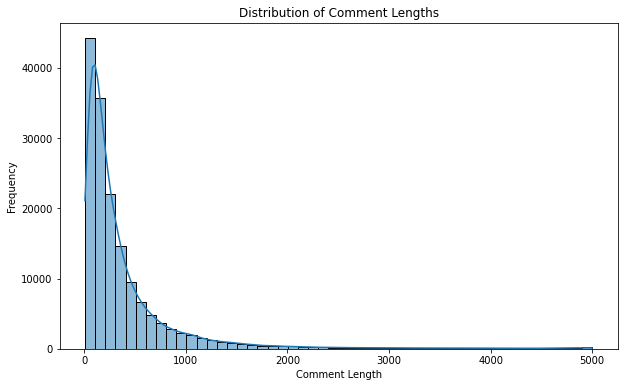

In [15]:
df['comment_length'] = df['comment_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='comment_length', bins=50, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

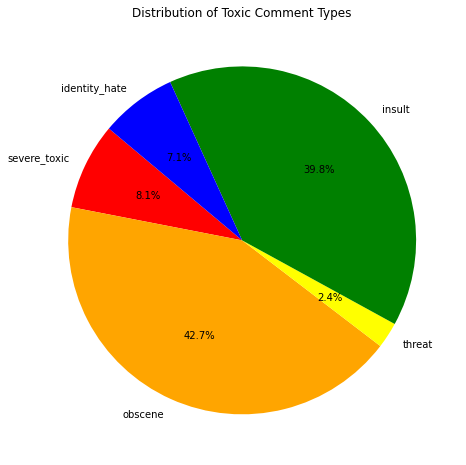

In [16]:
types = df[['severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()
plt.figure(figsize=(10, 8))
plt.pie(types, labels=types.index, autopct='%1.1f%%', startangle=140, colors=['red', 'orange', 'yellow', 'green', 'blue'])
plt.title('Distribution of Toxic Comment Types')
plt.show()

C:\Users\Dr. Poonam\AppData\Local\Temp\ipykernel_10216\2772348749.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[:-1].corr()


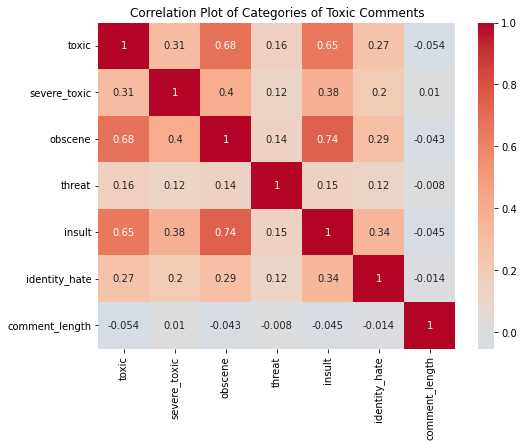

In [17]:
#Correlation
correlation_matrix = df[:-1].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Plot of Categories of Toxic Comments')
plt.show()

# Now Preprocessing Of Data

In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    text = word_tokenize(text) 
    # remove any non ascii
    text = [word.encode('ascii', 'ignore').decode('ascii') for word in text]
    lmtzr = WordNetLemmatizer()
    text = [lmtzr.lemmatize(w) for w in text]
    text = [w for w in text if len(w) > 2]
    
    #Removing Stop words
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]
    
    #Joining words to a single string
    cleaned_text = ' '.join(text)

    return cleaned_text 


In [116]:
clean_text

<function __main__.clean_text(text)>

In [118]:
#with open("preprocessor.pkl" , "wb") as f:
 #   pickle.dump( clean_text , f)

In [121]:
f=pickle.load(open("preprocessor.pkl" , "rb"))

In [19]:
from tqdm import tqdm
tqdm.pandas()

In [20]:
df["clean_text"]=df["comment_text"].progress_apply(clean_text)

100%|█████████████████████████████████████████████████████████████████████████| 159571/159571 [04:27<00:00, 597.09it/s]


Saving Clean Data 

In [21]:
#df.to_csv("clean_test15k.csv")

In [22]:
df=pd.read_csv(r"clean_test15k.csv")

In [23]:
df.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_text
0,0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,aww match background colour seemingly stuck th...
2,2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man really trying edit war guy constantly ...
3,3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,make real suggestion improvement wondered sect...
4,4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page


In [24]:
df=df.dropna()

# Word Cloude

1st for All Text

In [25]:
text=df["clean_text"].values

In [26]:
text=" ".join(text)

In [27]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

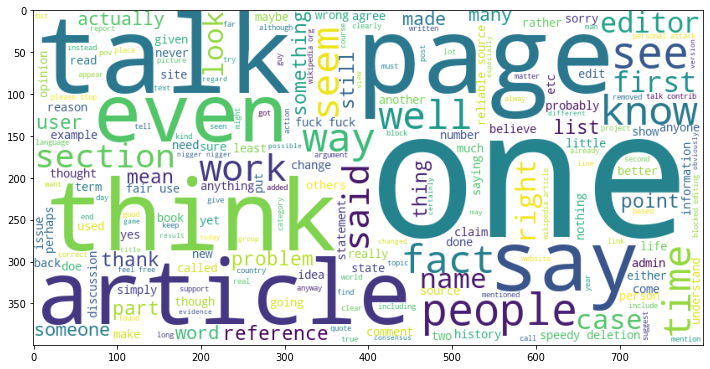

In [28]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)

Making Function for Word Cloude for all comment

In [29]:
def word(text1):
    t_df=df[df[text1]==1]
    text=" ".join(t_df["clean_text"])    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.title(f"WordCloud for {text1}")
    plt.imshow(wordcloud)
    plt.show()

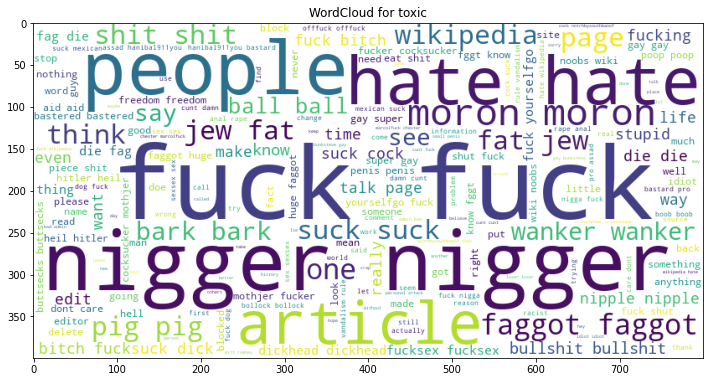

In [30]:
plt.figure(figsize=(12,8))
word("toxic")

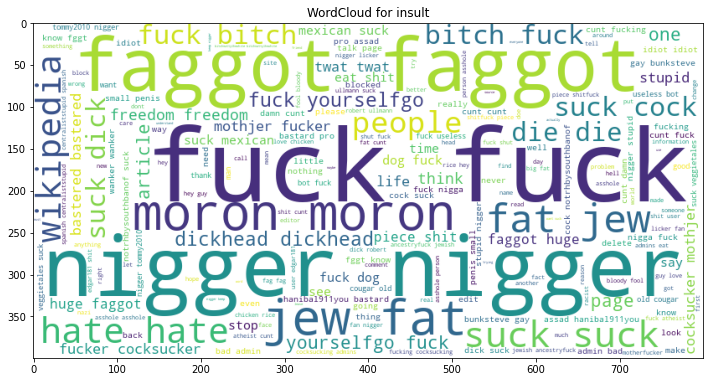

In [31]:
plt.figure(figsize=(12,8))
word("insult")

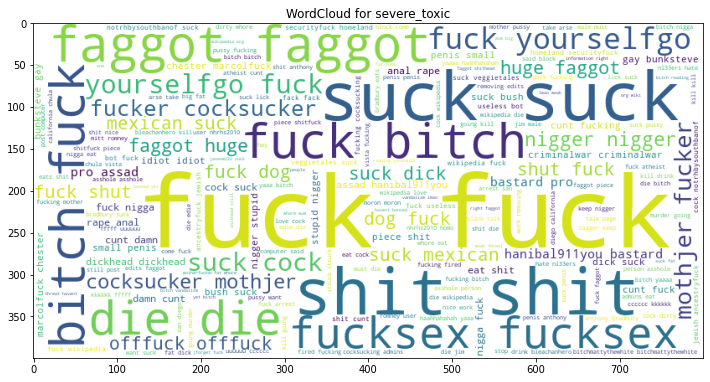

In [32]:
plt.figure(figsize=(12,8))
word("severe_toxic")

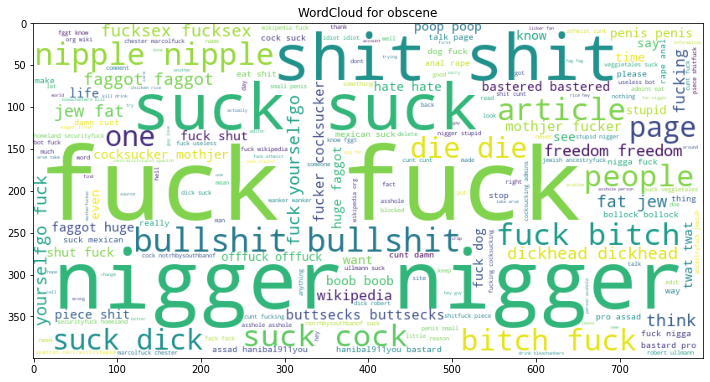

In [33]:
plt.figure(figsize=(12,8))
word("obscene")

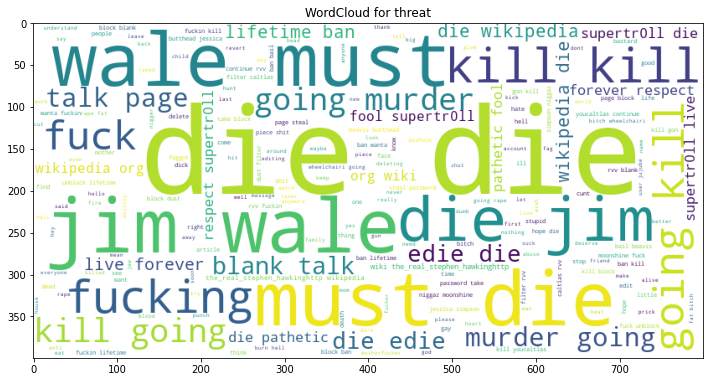

In [34]:
plt.figure(figsize=(12,8))
word("threat")

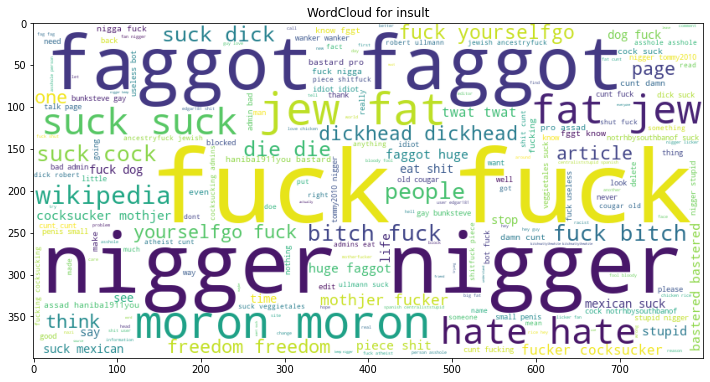

In [35]:
plt.figure(figsize=(12,8))
word("insult")

# Now Model Building

In [36]:
df.head(1)

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_text
0,0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...


In [37]:
df=df.drop("Unnamed: 0" , axis=1)

In [38]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean_text       0
dtype: int64

In [39]:
df=df.dropna()

1st we will take only one Target Variable toxic 

In [40]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [41]:
tfidf_vectorizer.fit(df["clean_text"])

TfidfVectorizer(max_features=5000)

# For Toxic Only

In [42]:
toxic=df[df["toxic"]==1]

In [43]:
non=df[df["toxic"]==0].sample(13000 , random_state=34)

In [44]:
sam=pd.concat([non , toxic] , axis=0)

In [45]:
x=sam["clean_text"]
y=sam["toxic"]

In [46]:
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size=0.2 , random_state=32)

In [47]:
x_train=tfidf_vectorizer.transform(x_train)
x_test=tfidf_vectorizer.transform(x_test)

In [48]:
clf=LogisticRegression()

In [49]:
progress_bar = tqdm(total=100, position=0, leave=True)
for i in range(100):
    clf.fit(x_train , y_train)
    y_pred=clf.predict(x_test)
    accuracy_score(y_test , y_pred)
    progress_bar.set_description(f"epp[{i+1}/{100}]")

epp[100/100]:   0%|                                                                            | 0/100 [00:20<?, ?it/s]

In [50]:
accuracy_score(y_test , y_pred)

0.8858253799929303

 Same We Will Do all Naive Bayes Algorithm

In [51]:
from sklearn.naive_bayes import MultinomialNB , GaussianNB , BernoulliNB

In [52]:
MNB=MultinomialNB()
GNB=GaussianNB()
BNB=BernoulliNB()

In [53]:
MNB.fit(x_train , y_train)
y_pred_mnb=MNB.predict(x_test)
accuracy_score(y_pred_mnb , y_test)

0.8727465535524921

In [54]:
x_train=x_train.toarray()
x_test=x_test.toarray()

In [55]:
GNB.fit(x_train , y_train)
y_pred_gnb=GNB.predict(x_test)
accuracy_score(y_pred_gnb , y_test)

0.7606928243195475

Now We Will Do one by one  , Every Label Will be once Target Variable

Making Function To take balance Out put Variable

In [56]:
def data(text):
    one=df[df[text]==1]
    zero=df[df[text]==0]
    if len(one)>len(zero):
        bal_one=one.sample(len(zero) , random_state=34)
        s=pd.concat[(bal_one , zero)]
        return pd.DataFrame(s)
    else:
        bal_zero=zero.sample(len(one) , random_state=67)
        k=pd.concat([bal_zero , one ])
        return k

In [57]:
svc=SVC(kernel="sigmoid" , gamma=1.0)
dtc=DecisionTreeClassifier(max_depth=5)
rfc=RandomForestClassifier(n_estimators=50 , random_state=2)
knc=KNeighborsClassifier()
lrc=LogisticRegression(solver="liblinear" , penalty="l1")
bc=BaggingClassifier(n_estimators=50 , random_state=2)
abc=AdaBoostClassifier(n_estimators=50 , random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50 , random_state=2)
#xgb=XGBClassifier(n_estimators=50 ,random_state=2)

In [58]:
#Function For claasification
#def predict(classifier):
 #   classifier.fit(x_train , y_train )
  #  y_pred=classifier.predict(x_test)
   # return accuracy_score(y_test , y_pred)

In [59]:
label=["toxic" , "severe_toxic" , "obscene" , "threat" , "insult" , "identity_hate"]

In [60]:
def predict(classifier):
    for i in label:
        bal_dataframe=data(i)
        shuffle1=shuffle(bal_dataframe)
        x=shuffle1["clean_text"]
        y=shuffle1[i]
        tfidf_vectorizer.fit(x)
        x_train , x_test , y_train , y_test=train_test_split(x,y , random_state=78)
        x_train=tfidf_vectorizer.transform(x_train)
        x_test=tfidf_vectorizer.transform(x_test)
        classifier.fit(x_train , y_train)
        y_pred=classifier.predict(x_test)
        accuracy=accuracy_score(y_test , y_pred)
        print(f"accuracy for {i} is {accuracy}")

In [61]:
predict(svc)

accuracy for toxic is 0.8937728937728938
accuracy for severe_toxic is 0.9573400250941029
accuracy for obscene is 0.9206537186167693
accuracy for threat is 0.9079497907949791
accuracy for insult is 0.9113538227076454
accuracy for identity_hate is 0.9031339031339032


In [62]:
predict(dtc)

accuracy for toxic is 0.6647043432757719
accuracy for severe_toxic is 0.8531994981179423
accuracy for obscene is 0.7771198484130744
accuracy for threat is 0.7698744769874477
accuracy for insult is 0.7284734569469139
accuracy for identity_hate is 0.7863247863247863


In [63]:
predict(rfc)

accuracy for toxic is 0.8707482993197279
accuracy for severe_toxic is 0.918444165621079
accuracy for obscene is 0.9168640454760777
accuracy for threat is 0.8870292887029289
accuracy for insult is 0.8928117856235712
accuracy for identity_hate is 0.8945868945868946


# Multilabel Classification 

In [64]:
df.shape

(159532, 9)

We Have Very Large Amount Of Data  , We can not train model on this data  , after vectorizer data beacome to large we will take a sample

In [65]:
sam_df=df.sample(10000 , random_state=678)

In [66]:
x=sam_df["clean_text"]
y=sam_df[["toxic" , "severe_toxic" , "obscene" ,"threat" , "insult" , "identity_hate"]]

In [67]:
vector=TfidfVectorizer(max_features=5001)

In [68]:
vector.fit(x)

TfidfVectorizer(max_features=5001)

In [92]:
with open("Vectorizer.pkl" , "wb") as vectorizer:
    pickle.dump(vector , vectorizer)

In [69]:
x_train ,x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)

In [70]:
x_train = vector.transform(x_train)
x_test = vector.transform(x_test)

In [71]:
classifier1=BinaryRelevance(svc)

In [72]:
#progress_bar=tqdm(total=100 , position=0 , leave=True)
#for i in range(100):
 #   classifier1.fit(x_train , y_train)
  #  y_pred=classifier1.predict(x_test)
   # accuracy_score(y_test , y_pred)
    #progress_bar.set_description(f"Epochs [{i+1}/{100}]")

In [73]:
import pickle
#with open("svc.pkl" , "wb" ) as f:
 #   pickle.dump(classifier1 , f )

In [74]:
with open("svc.pkl" , "rb") as f:
    classifier1=pickle.load(f)

In [75]:
y_pred=classifier1.predict(x_test)

In [76]:
accuracy_score(y_test , y_pred)

0.924

Here We have 6 classes , if any one value of label is predicted means comment is toxic , so we will convert all classes from 1 to 6 in 1 and will calcaulate accuracy score

In [77]:
sam2=y_test.sum(axis=1).apply(lambda x : 1 if x!=0 else 0)

In [78]:
a=y_pred.sum(axis=1)

In [79]:
s=np.where(a!=0 ,1 , 0 )

In [80]:
accuracy_score(s , sam2)

0.953

In [100]:
s=vector.transform(["my name is priyanshu"]).toarray()

In [102]:
classifier1.predict(s).toarray()

array([[0, 0, 0, 0, 0, 0]], dtype=int64)

In [106]:
for i in classifier1.predict(s).toarray():
    for j in i:
        if j==1:
            print("Toxic")
        else:
            print("Non_Toxc")

Non_Toxc
Non_Toxc
Non_Toxc
Non_Toxc
Non_Toxc
Non_Toxc


In [ ]:
  vect=list((vect.toarray()))
    vect=predictor.predict(vect)
    vect=list(vect.toarray())

In [130]:
df[df["toxic"]==1]["comment_text"].values[180]

"We own the project so how the heck is it Unambiguous copyright infringement????? And it wasnt written in a promotional way, it just explained the project and the system requirments! I'm starting to see why so many people hate wikipedia..."